<a href="https://colab.research.google.com/github/benafshapostwala/Data_Mining_CW/blob/main/Data_Mining_CW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing and mounting google drive as we have stored the data in a folder here (saved in email id benbakes21@gmail.com)
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#importing the excel file containing the data using pandas
import pandas as pd
data = pd.ExcelFile('/content/gdrive/My Drive/Data_mining_cw2_data/LendingClubLoans2018-2020.xlsx')

In [3]:
#converting excel file to pandas dataframe
lending_data=pd.read_excel(data)

In [4]:
#checking how many rows
lending_data.shape[0]

77159

In [5]:
#inspecting the first 5 rows of the dataframe
lending_data.head()

,id,emp_title,application_type,home_ownership,loan_status,loan_amnt,int_rate,term,installment,grade,earliest_cr_line,issue_d,last_pymnt_d,next_pymnt_d,annual_inc,annual_inc_joint,verification_status,verification_status_joint,pymnt_plan,purpose,hardship_flag,hardship_reason,hardship_type,hardship_status,payment_plan_start_date,dti,dti_joint,delinq_2yrs,inq_fi,inq_last_12m,inq_last_6mths,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,mort_acc,open_acc,open_acc_6m,acc_open_past_24mths,pub_rec,...,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,open_act_il,open_il_12m,open_il_24m,il_util,bc_util,all_util,revol_util,open_rv_12m,open_rv_24m,max_bal_bc,avg_cur_bal,bc_open_to_buy,recoveries,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,revol_bal_joint,deferral_term,hardship_amount,hardship_payoff_balance_amount,hardship_last_payment_amount,orig_projected_additional_accrued_interest
0,113924213,Stagehand,Individual,RENT,Fully Paid,35000,0.1505,36 months,1214.15,C,2001-01-01,2017-08-01,2020-04-01,NaT,110000.0,NaN,Verified,NaN,n,debt_consolidation,N,NaN,NaN,NaN,NaT,9.13,NaN,0,1.0,1.0,1,680,684,689,685,1,7,1.0,5,0,...,13,1,2.0,1.0,1.0,39.0,57.4,47.0,0.563,0.0,4.0,5948.0,3150.0,7975.0,0.00,0,0.0000,0,1,4,5,4,4,2,5,6,5,7,0,1,80.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,113101099,Detention Deputy,Individual,RENT,Charged Off,21000,0.1408,60 months,489.51,C,2000-12-01,2017-07-01,2019-06-01,NaT,54000.0,NaN,Not Verified,NaN,n,debt_consolidation,N,NaN,NaN,NaN,NaT,20.67,NaN,0,1.0,1.0,1,710,714,589,585,0,13,1.0,4,1,...,1,1,3.0,0.0,2.0,38.0,67.7,40.0,0.435,1.0,2.0,6186.0,7232.0,4623.0,2147.89,0,386.6202,0,0,3,5,3,3,34,10,11,5,13,0,1,100.0,33.3,1,0,NaN,NaN,NaN,NaN,NaN,NaN
2,113672609,NaN,Individual,MORTGAGE,Current,20000,0.1408,60 months,466.20,C,1986-04-01,2017-07-01,2020-05-01,2020-06-01,74000.0,NaN,Verified,NaN,n,home_improvement,N,NaN,NaN,NaN,NaT,18.33,NaN,0,2.0,3.0,1,760,764,689,685,1,14,2.0,4,0,...,2,2,1.0,1.0,1.0,97.0,10.5,46.0,0.097,1.0,3.0,1315.0,5385.0,28983.0,0.00,0,0.0000,0,0,6,7,11,14,2,12,17,7,14,0,2,100.0,18.2,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,115053799,Driver,Individual,RENT,Fully Paid,16000,0.1903,36 months,586.74,D,1990-02-01,2017-08-01,2019-10-01,NaT,58000.0,NaN,Source Verified,NaN,n,debt_consolidation,N,NaN,NaN,NaN,NaT,29.05,NaN,0,0.0,1.0,1,670,674,644,640,1,10,2.0,5,1,...,2,2,2.0,0.0,2.0,75.0,86.9,80.0,0.869,2.0,3.0,4888.0,4300.0,3167.0,0.00,0,0.0000,0,0,8,8,8,20,4,8,27,8,10,0,2,95.7,75.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
4,6317122,JP Morgan Chase,Individual,MORTGAGE,Fully Paid,24000,0.0890,60 months,497.04,A,1988-03-01,2013-08-01,2019-01-01,NaT,94020.0,NaN,Verified,NaN,n,debt_consolidation,N,NATURAL_DISASTER,INTEREST ONLY-3 MONTHS DEFERRAL,COMPLETED,2017-11-01,23.22,NaN,0,NaN,NaN,0,785,789,759,755,6,12,NaN,2,0,...,88,10,NaN,NaN,NaN,NaN,1.8,NaN,0.242,NaN,NaN,NaN,32135.0,25325.0,0.00,0,0.0000,0,0,1,4,3,5,6,7,11,4,12,0,1,100.0,0.0,0,0,NaN,3.0,38.81,5283.25,42.29,116.43


In [6]:
#by describing the data, we can obtain a summary statistical report of all numerical variables
num_data=lending_data.describe()
Numerical_variables=num_data.columns
#now we can create a list of all numerical variables without listing them one by one
Numerical_variables=list(Numerical_variables)
Numerical_variables


['id',
 'loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'annual_inc_joint',
 'dti',
 'dti_joint',
 'delinq_2yrs',
 'inq_fi',
 'inq_last_12m',
 'inq_last_6mths',
 'fico_range_low',
 'fico_range_high',
 'last_fico_range_high',
 'last_fico_range_low',
 'mort_acc',
 'open_acc',
 'open_acc_6m',
 'acc_open_past_24mths',
 'pub_rec',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'total_cu_tl',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_bal_il',
 'total_rev_hi_lim',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'mths_since_last_record',
 'mths_since_last_major_derog',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_rcnt_il',
 'mths_since_last_delinq',
 'mths_since_recent_revol_delinq',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'open_act_il',
 'open_

In [7]:
#Our target variable is 'loan_status' so we must take a look at how many classes we are dealing with
lending_data['loan_status'].unique()
#here we list out all the column names or variables in our data
all_variables=list(lending_data.columns)
all_variables

['id',
 'emp_title',
 'application_type',
 'home_ownership',
 'loan_status',
 'loan_amnt',
 'int_rate',
 'term',
 'installment',
 'grade',
 'earliest_cr_line',
 'issue_d',
 'last_pymnt_d',
 'next_pymnt_d',
 'annual_inc',
 'annual_inc_joint',
 'verification_status',
 'verification_status_joint',
 'pymnt_plan',
 'purpose',
 'hardship_flag',
 'hardship_reason',
 'hardship_type',
 'hardship_status',
 'payment_plan_start_date',
 'dti',
 'dti_joint',
 'delinq_2yrs',
 'inq_fi',
 'inq_last_12m',
 'inq_last_6mths',
 'fico_range_low',
 'fico_range_high',
 'last_fico_range_high',
 'last_fico_range_low',
 'mort_acc',
 'open_acc',
 'open_acc_6m',
 'acc_open_past_24mths',
 'pub_rec',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'total_cu_tl',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_bal_il',
 'total_rev_hi_lim',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'tota

In [8]:
import numpy as np
#to obtain a list of all categorical variables, we can comapare the all_variables list and Numerical_variables list
# to find the elements that are NOT listed in Numerical variables as they would have to be categorical in nature. 
#This is a short cut to avoid listing out by typing.
Categorical_variables = list(np.setdiff1d(all_variables,Numerical_variables))
Categorical_variables
#taking a look at the different categories for each categorical variable that will help us decide which encoder to use
for i in Categorical_variables:
  print(i,lending_data[i].unique())

application_type ['Individual' 'Joint App']
earliest_cr_line ['2001-01-01T00:00:00.000000000' '2000-12-01T00:00:00.000000000'
 '1986-04-01T00:00:00.000000000' '1990-02-01T00:00:00.000000000'
 '1988-03-01T00:00:00.000000000' '2003-11-01T00:00:00.000000000'
 '1986-09-01T00:00:00.000000000' '2005-06-01T00:00:00.000000000'
 '2010-05-01T00:00:00.000000000' '1992-05-01T00:00:00.000000000'
 '2007-07-01T00:00:00.000000000' '2012-08-01T00:00:00.000000000'
 '1998-03-01T00:00:00.000000000' '2000-08-01T00:00:00.000000000'
 '2010-10-01T00:00:00.000000000' '1999-12-01T00:00:00.000000000'
 '2001-07-01T00:00:00.000000000' '2006-12-01T00:00:00.000000000'
 '2006-09-01T00:00:00.000000000' '1998-04-01T00:00:00.000000000'
 '1996-01-01T00:00:00.000000000' '2003-10-01T00:00:00.000000000'
 '2005-04-01T00:00:00.000000000' '2003-07-01T00:00:00.000000000'
 '2007-08-01T00:00:00.000000000' '2002-04-01T00:00:00.000000000'
 '2004-06-01T00:00:00.000000000' '2003-01-01T00:00:00.000000000'
 '2005-01-01T00:00:00.0000000

In [9]:
lending_data = lending_data.drop(['earliest_cr_line', 'issue_d', 'last_pymnt_d', 'next_pymnt_d', 'payment_plan_start_date', 'pymnt_plan'], axis=1)
lending_data
lending_data = lending_data.drop(['id'], axis=1)
lending_data

,emp_title,application_type,home_ownership,loan_status,loan_amnt,int_rate,term,installment,grade,annual_inc,annual_inc_joint,verification_status,verification_status_joint,purpose,hardship_flag,hardship_reason,hardship_type,hardship_status,dti,dti_joint,delinq_2yrs,inq_fi,inq_last_12m,inq_last_6mths,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,mort_acc,open_acc,open_acc_6m,acc_open_past_24mths,pub_rec,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,...,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,open_act_il,open_il_12m,open_il_24m,il_util,bc_util,all_util,revol_util,open_rv_12m,open_rv_24m,max_bal_bc,avg_cur_bal,bc_open_to_buy,recoveries,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,revol_bal_joint,deferral_term,hardship_amount,hardship_payoff_balance_amount,hardship_last_payment_amount,orig_projected_additional_accrued_interest
0,Stagehand,Individual,RENT,Fully Paid,35000,0.1505,36 months,1214.15,C,110000.0,NaN,Verified,NaN,debt_consolidation,N,NaN,NaN,NaN,9.13,NaN,0,1.0,1.0,1,680,684,689,685,1,7,1.0,5,0,10,w,0.00,0.00,43573.779596,43573.78,35000.00,...,13,1,2.0,1.0,1.0,39.0,57.4,47.0,0.563,0.0,4.0,5948.0,3150.0,7975.0,0.00,0,0.0000,0,1,4,5,4,4,2,5,6,5,7,0,1,80.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,Detention Deputy,Individual,RENT,Charged Off,21000,0.1408,60 months,489.51,C,54000.0,NaN,Not Verified,NaN,debt_consolidation,N,NaN,NaN,NaN,20.67,NaN,0,1.0,1.0,1,710,714,589,585,0,13,1.0,4,1,45,w,0.00,0.00,13274.320000,13274.32,6376.13,...,1,1,3.0,0.0,2.0,38.0,67.7,40.0,0.435,1.0,2.0,6186.0,7232.0,4623.0,2147.89,0,386.6202,0,0,3,5,3,3,34,10,11,5,13,0,1,100.0,33.3,1,0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Individual,MORTGAGE,Current,20000,0.1408,60 months,466.20,C,74000.0,NaN,Verified,NaN,home_improvement,N,NaN,NaN,NaN,18.33,NaN,0,2.0,3.0,1,760,764,689,685,1,14,2.0,4,0,20,w,10734.69,10734.69,15462.830000,15462.83,9265.31,...,2,2,1.0,1.0,1.0,97.0,10.5,46.0,0.097,1.0,3.0,1315.0,5385.0,28983.0,0.00,0,0.0000,0,0,6,7,11,14,2,12,17,7,14,0,2,100.0,18.2,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,Driver,Individual,RENT,Fully Paid,16000,0.1903,36 months,586.74,D,58000.0,NaN,Source Verified,NaN,debt_consolidation,N,NaN,NaN,NaN,29.05,NaN,0,0.0,1.0,1,670,674,644,640,1,10,2.0,5,1,34,w,0.00,0.00,20685.951468,20685.95,16000.00,...,2,2,2.0,0.0,2.0,75.0,86.9,80.0,0.869,2.0,3.0,4888.0,4300.0,3167.0,0.00,0,0.0000,0,0,8,8,8,20,4,8,27,8,10,0,2,95.7,75.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
4,JP Morgan Chase,Individual,MORTGAGE,Fully Paid,24000,0.0890,60 months,497.04,A,94020.0,NaN,Verified,NaN,debt_consolidation,N,NATURAL_DISASTER,INTEREST ONLY-3 MONTHS DEFERRAL,COMPLETED,23.22,NaN,0,NaN,NaN,0,785,789,759,755,6,12,NaN,2,0,24,w,0.00,0.00,29997.021437,29997.02,24000.00,...,88,10,NaN,NaN,NaN,NaN,1.8,NaN,0.242,NaN,NaN,NaN,32135.0,25325.0,0.00,0,0.0000,0,0,1,4,3,5,6,7,11,4,12,0,1,100.0,0.0,0,0,NaN,3.0,38.81,5283.25,42.29,116.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77154,IT analyst,Individual,MORTGAGE,Current,3500,0.1505,36 months,121.42,C,109000.0,NaN,Verified,NaN,other,N,NaN,NaN,NaN,32.49,NaN,0,0.0,3.0,4,695,699,724,720,2,16,1.0,3,0,28,w,470.57,470.57,3881.060000,3881.06,3029.43,...,6,6,3.0,0.0,1.0,53.0,99.0,77.0,0.770,1.0,2.0,21441.0,17616.0,9350.0,0.00,0,0.0000,0,0,6,10,8,8,8,10,18,9,14,0,1,100.0,100.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
77155,Principal IA Engineer,Individual,MORTGAGE,Current,2000,0.0797,36 months,62.65,A,180000.0,NaN,Not Verified,NaN,home_improvement,N,NaN,N

In [10]:
#finding the number of null values for each variable or column
nul_vals=lending_data.isnull().sum()
nul_vals=nul_vals.reset_index()
high_nul_vals=nul_vals[nul_vals[0] >= 5000]
print(list(high_nul_vals['index']))

['emp_title', 'annual_inc_joint', 'verification_status_joint', 'hardship_reason', 'hardship_type', 'hardship_status', 'dti_joint', 'mths_since_last_record', 'mths_since_last_major_derog', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_last_delinq', 'mths_since_recent_revol_delinq', 'il_util', 'revol_bal_joint', 'deferral_term', 'hardship_amount', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'orig_projected_additional_accrued_interest']


In [11]:
#dropping all the columns or variables that have too many nan values, now we can encode the categorical variables
lending_data = lending_data.drop(['annual_inc_joint', 'verification_status_joint', 'hardship_reason', 'hardship_type', 'hardship_status', 'dti_joint', 'mths_since_last_record', 'mths_since_last_major_derog', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_last_delinq', 'mths_since_recent_revol_delinq', 'il_util', 'revol_bal_joint', 'deferral_term', 'hardship_amount', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'orig_projected_additional_accrued_interest'], axis=1)
lending_data = lending_data.drop(['emp_title'], axis=1)
lending_data

,application_type,home_ownership,loan_status,loan_amnt,int_rate,term,installment,grade,annual_inc,verification_status,purpose,hardship_flag,dti,delinq_2yrs,inq_fi,inq_last_12m,inq_last_6mths,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,mort_acc,open_acc,open_acc_6m,acc_open_past_24mths,pub_rec,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,total_cu_tl,tot_coll_amt,tot_cur_bal,total_bal_il,total_rev_hi_lim,...,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,mths_since_recent_bc,mths_since_rcnt_il,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,open_act_il,open_il_12m,open_il_24m,bc_util,all_util,revol_util,open_rv_12m,open_rv_24m,max_bal_bc,avg_cur_bal,bc_open_to_buy,recoveries,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens
0,Individual,RENT,Fully Paid,35000,0.1505,36 months,1214.15,C,110000.0,Verified,debt_consolidation,N,9.13,0,1.0,1.0,1,680,684,689,685,1,7,1.0,5,0,10,w,0.00,0.00,43573.779596,43573.78,35000.00,8573.78,0.0,1.0,551,22049,9213.0,22800,...,22049,18700,23765,14.0,1.0,40.0,46,13,1,2.0,1.0,1.0,57.4,47.0,0.563,0.0,4.0,5948.0,3150.0,7975.0,0.00,0,0.0000,0,1,4,5,4,4,2,5,6,5,7,0,1,80.0,0.0,0,0
1,Individual,RENT,Charged Off,21000,0.1408,60 months,489.51,C,54000.0,Not Verified,debt_consolidation,N,20.67,0,1.0,1.0,1,710,714,589,585,0,13,1.0,4,1,45,w,0.00,0.00,13274.320000,13274.32,6376.13,4750.30,0.0,0.0,76,86785,76738.0,23100,...,86785,14300,96104,1.0,13.0,147.0,199,1,1,3.0,0.0,2.0,67.7,40.0,0.435,1.0,2.0,6186.0,7232.0,4623.0,2147.89,0,386.6202,0,0,3,5,3,3,34,10,11,5,13,0,1,100.0,33.3,1,0
2,Individual,MORTGAGE,Current,20000,0.1408,60 months,466.20,C,74000.0,Verified,home_improvement,N,18.33,0,2.0,3.0,1,760,764,689,685,1,14,2.0,4,0,20,w,10734.69,10734.69,15462.830000,15462.83,9265.31,6197.52,0.0,0.0,0,75396,24268.0,35900,...,27749,32400,25000,2.0,3.0,128.0,375,2,2,1.0,1.0,1.0,10.5,46.0,0.097,1.0,3.0,1315.0,5385.0,28983.0,0.00,0,0.0000,0,0,6,7,11,14,2,12,17,7,14,0,2,100.0,18.2,0,0
3,Individual,RENT,Fully Paid,16000,0.1903,36 months,586.74,D,58000.0,Source Verified,debt_consolidation,N,29.05,0,0.0,1.0,1,670,674,644,640,1,10,2.0,5,1,34,w,0.00,0.00,20685.951468,20685.95,16000.00,4685.95,0.0,2.0,2104,43001,22068.0,24100,...,43001,24100,29605,2.0,16.0,119.0,321,2,2,2.0,0.0,2.0,86.9,80.0,0.869,2.0,3.0,4888.0,4300.0,3167.0,0.00,0,0.0000,0,0,8,8,8,20,4,8,27,8,10,0,2,95.7,75.0,1,0
4,Individual,MORTGAGE,Fully Paid,24000,0.0890,60 months,497.04,A,94020.0,Verified,debt_consolidation,N,23.22,0,NaN,NaN,0,785,789,759,755,6,12,NaN,2,0,24,w,0.00,0.00,29997.021437,29997.02,24000.00,5997.02,0.0,NaN,0,353484,NaN,63200,...,59716,25800,48962,122.0,NaN,147.0,308,88,10,NaN,NaN,NaN,1.8,NaN,0.242,NaN,NaN,NaN,32135.0,25325.0,0.00,0,0.0000,0,0,1,4,3,5,6,7,11,4,12,0,1,100.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77154,Individual,MORTGAGE,Current,3500,0.1505,36 months,121.42,C,109000.0,Verified,other,N,32.49,0,0.0,3.0,4,695,699,724,720,2,16,1.0,3,0,28,w,470.57,470.57,3881.060000,3881.06,3029.43,851.63,0.0,0.0,0,246635,33924.0,81750,...,97276,56100,63967,13.0,23.0,170.0,267,6,6,3.0,0.0,1.0,99.0,77.0,0.770,1.0,2.0,21441.0,17616.0,9350.0,0.00,0,0.0000,0,0,6,10,8,8,8,10,18,9,14,0,1,100.0,100.0,0,0
77155,Individual,MORTGAGE,Current,2000,0.0797,36 months,62.65,A,180000.0,Not Verified,home_improvement,N,10.64,0,0.0,4.0,0,725,729,674,670,4,9,1.0,3,0,20,w

In [12]:
#View the filtered set of categorical and numerical variables
f_num_data=lending_data.describe()
f_Numerical_variables=f_num_data.columns
#now we can create a list of all numerical variables without listing them one by one
f_Numerical_variables=list(f_Numerical_variables)
f_Numerical_variables
f_all_variables=list(lending_data.columns)
f_all_variables
f_Categorical_variables = list(np.setdiff1d(f_all_variables,f_Numerical_variables))
f_Categorical_variables
#taking a look at the different categories for each categorical variable that will help us decide which encoder to use
for i in f_Categorical_variables:
  print(i,lending_data[i].unique())

application_type ['Individual' 'Joint App']
grade ['C' 'D' 'A' 'B' 'E' 'G' 'F']
hardship_flag ['N' nan 'Y']
home_ownership ['RENT' 'MORTGAGE' 'OWN' 'NONE' 'ANY']
initial_list_status ['w' 'f']
loan_status ['Fully Paid' 'Charged Off' 'Current' 'In Grace Period'
 'Late (31-120 days)' 'Late (16-30 days)' 'Default']
purpose ['debt_consolidation' 'home_improvement' 'other' 'medical' 'credit_card'
 'vacation' 'house' 'major_purchase' 'small_business' 'moving' 'car'
 'renewable_energy' 'wedding']
term ['36 months' '60 months']
verification_status ['Verified' 'Not Verified' 'Source Verified']


In [14]:
#Checking how balanced the dataset is, i.e. how many entries for each category of the traget variable
lending_data['loan_status'].value_counts(dropna=False)

Fully Paid            34289
Current               32039
Charged Off            9614
Late (31-120 days)      659
In Grace Period         448
Late (16-30 days)        96
Default                  14
Name: loan_status, dtype: int64

In [32]:
import category_encoders as ce
from category_encoders import BackwardDifferenceEncoder

In [33]:
lending_data

,application_type,home_ownership,loan_status,loan_amnt,int_rate,term,installment,grade,annual_inc,verification_status,purpose,hardship_flag,dti,delinq_2yrs,inq_fi,inq_last_12m,inq_last_6mths,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,mort_acc,open_acc,open_acc_6m,acc_open_past_24mths,pub_rec,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,total_cu_tl,tot_coll_amt,tot_cur_bal,total_bal_il,total_rev_hi_lim,...,total_bc_limit,total_il_high_credit_limit,mths_since_recent_bc,mths_since_rcnt_il,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,open_act_il,open_il_12m,open_il_24m,bc_util,all_util,revol_util,open_rv_12m,open_rv_24m,max_bal_bc,avg_cur_bal,bc_open_to_buy,recoveries,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,loan_stat_code
0,Individual,RENT,Fully Paid,35000,0.1505,36 months,1214.15,C,110000.0,Verified,debt_consolidation,N,9.13,0,1.0,1.0,1,680,684,689,685,1,7,1.0,5,0,10,w,0.00,0.00,43573.779596,43573.78,35000.00,8573.78,0.0,1.0,551,22049,9213.0,22800,...,18700,23765,14.0,1.0,40.0,46,13,1,2.0,1.0,1.0,57.4,47.0,0.563,0.0,4.0,5948.0,3150.0,7975.0,0.00,0,0.0000,0,1,4,5,4,4,2,5,6,5,7,0,1,80.0,0.0,0,0,<loo_encoder.encoder.LeaveOneOutEncoder object...
1,Individual,RENT,Charged Off,21000,0.1408,60 months,489.51,C,54000.0,Not Verified,debt_consolidation,N,20.67,0,1.0,1.0,1,710,714,589,585,0,13,1.0,4,1,45,w,0.00,0.00,13274.320000,13274.32,6376.13,4750.30,0.0,0.0,76,86785,76738.0,23100,...,14300,96104,1.0,13.0,147.0,199,1,1,3.0,0.0,2.0,67.7,40.0,0.435,1.0,2.0,6186.0,7232.0,4623.0,2147.89,0,386.6202,0,0,3,5,3,3,34,10,11,5,13,0,1,100.0,33.3,1,0,<loo_encoder.encoder.LeaveOneOutEncoder object...
2,Individual,MORTGAGE,Current,20000,0.1408,60 months,466.20,C,74000.0,Verified,home_improvement,N,18.33,0,2.0,3.0,1,760,764,689,685,1,14,2.0,4,0,20,w,10734.69,10734.69,15462.830000,15462.83,9265.31,6197.52,0.0,0.0,0,75396,24268.0,35900,...,32400,25000,2.0,3.0,128.0,375,2,2,1.0,1.0,1.0,10.5,46.0,0.097,1.0,3.0,1315.0,5385.0,28983.0,0.00,0,0.0000,0,0,6,7,11,14,2,12,17,7,14,0,2,100.0,18.2,0,0,<loo_encoder.encoder.LeaveOneOutEncoder object...
3,Individual,RENT,Fully Paid,16000,0.1903,36 months,586.74,D,58000.0,Source Verified,debt_consolidation,N,29.05,0,0.0,1.0,1,670,674,644,640,1,10,2.0,5,1,34,w,0.00,0.00,20685.951468,20685.95,16000.00,4685.95,0.0,2.0,2104,43001,22068.0,24100,...,24100,29605,2.0,16.0,119.0,321,2,2,2.0,0.0,2.0,86.9,80.0,0.869,2.0,3.0,4888.0,4300.0,3167.0,0.00,0,0.0000,0,0,8,8,8,20,4,8,27,8,10,0,2,95.7,75.0,1,0,<loo_encoder.encoder.LeaveOneOutEncoder object...
4,Individual,MORTGAGE,Fully Paid,24000,0.0890,60 months,497.04,A,94020.0,Verified,debt_consolidation,N,23.22,0,NaN,NaN,0,785,789,759,755,6,12,NaN,2,0,24,w,0.00,0.00,29997.021437,29997.02,24000.00,5997.02,0.0,NaN,0,353484,NaN,63200,...,25800,48962,122.0,NaN,147.0,308,88,10,NaN,NaN,NaN,1.8,NaN,0.242,NaN,NaN,NaN,32135.0,25325.0,0.00,0,0.0000,0,0,1,4,3,5,6,7,11,4,12,0,1,100.0,0.0,0,0,<loo_encoder.encoder.LeaveOneOutEncoder object...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77154,Individual,MORTGAGE,Current,3500,0.1505,36 months,121.42,C,109000.0,Verified,other,N,32.49,0,0.0,3.0,4,695,699,724,720,2,16,1.0,3,0,28,w,470.57,470.57,3881.060000,3881.06,3029.43,851.63,0.0,0.0,0,246635,33924.0,81750,...,56100,63967,13.0,23.0,170.0,267,6,6,3.0,0.0,1.0,99.0,77.0,0.770,1.0,2.0,21441.0,17616.0,9350.0,0.00

In [35]:
#from sklearn.preprocessing import LeaveOneOutEncoder
#LooE=LeaveOneOutEncoder()

encoder = ce.BackwardDifferenceEncoder(cols=['loan_status'])
df_bd = encoder.fit_transform(lending_data)

#lending_data["loan_stat_code"] = LeaveOneOutEncoder.fit_transform(lending_data[["loan_status"]])

#lending_data[["loan_stat_code", "loan_status"]]
#print(lending_data["loan_stat_code"].unique())
#print(lending_data["loan_status"].unique())
df_bd


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,intercept,application_type,home_ownership,loan_status_0,loan_status_1,loan_status_2,loan_status_3,loan_status_4,loan_status_5,loan_amnt,int_rate,term,installment,grade,annual_inc,verification_status,purpose,hardship_flag,dti,delinq_2yrs,inq_fi,inq_last_12m,inq_last_6mths,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,mort_acc,open_acc,open_acc_6m,acc_open_past_24mths,pub_rec,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,...,total_bc_limit,total_il_high_credit_limit,mths_since_recent_bc,mths_since_rcnt_il,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,open_act_il,open_il_12m,open_il_24m,bc_util,all_util,revol_util,open_rv_12m,open_rv_24m,max_bal_bc,avg_cur_bal,bc_open_to_buy,recoveries,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,loan_stat_code
0,1,Individual,RENT,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,35000,0.1505,36 months,1214.15,C,110000.0,Verified,debt_consolidation,N,9.13,0,1.0,1.0,1,680,684,689,685,1,7,1.0,5,0,10,w,0.00,0.00,43573.779596,43573.78,35000.00,8573.78,...,18700,23765,14.0,1.0,40.0,46,13,1,2.0,1.0,1.0,57.4,47.0,0.563,0.0,4.0,5948.0,3150.0,7975.0,0.00,0,0.0000,0,1,4,5,4,4,2,5,6,5,7,0,1,80.0,0.0,0,0,<loo_encoder.encoder.LeaveOneOutEncoder object...
1,1,Individual,RENT,0.142857,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,21000,0.1408,60 months,489.51,C,54000.0,Not Verified,debt_consolidation,N,20.67,0,1.0,1.0,1,710,714,589,585,0,13,1.0,4,1,45,w,0.00,0.00,13274.320000,13274.32,6376.13,4750.30,...,14300,96104,1.0,13.0,147.0,199,1,1,3.0,0.0,2.0,67.7,40.0,0.435,1.0,2.0,6186.0,7232.0,4623.0,2147.89,0,386.6202,0,0,3,5,3,3,34,10,11,5,13,0,1,100.0,33.3,1,0,<loo_encoder.encoder.LeaveOneOutEncoder object...
2,1,Individual,MORTGAGE,0.142857,0.285714,-0.571429,-0.428571,-0.285714,-0.142857,20000,0.1408,60 months,466.20,C,74000.0,Verified,home_improvement,N,18.33,0,2.0,3.0,1,760,764,689,685,1,14,2.0,4,0,20,w,10734.69,10734.69,15462.830000,15462.83,9265.31,6197.52,...,32400,25000,2.0,3.0,128.0,375,2,2,1.0,1.0,1.0,10.5,46.0,0.097,1.0,3.0,1315.0,5385.0,28983.0,0.00,0,0.0000,0,0,6,7,11,14,2,12,17,7,14,0,2,100.0,18.2,0,0,<loo_encoder.encoder.LeaveOneOutEncoder object...
3,1,Individual,RENT,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,16000,0.1903,36 months,586.74,D,58000.0,Source Verified,debt_consolidation,N,29.05,0,0.0,1.0,1,670,674,644,640,1,10,2.0,5,1,34,w,0.00,0.00,20685.951468,20685.95,16000.00,4685.95,...,24100,29605,2.0,16.0,119.0,321,2,2,2.0,0.0,2.0,86.9,80.0,0.869,2.0,3.0,4888.0,4300.0,3167.0,0.00,0,0.0000,0,0,8,8,8,20,4,8,27,8,10,0,2,95.7,75.0,1,0,<loo_encoder.encoder.LeaveOneOutEncoder object...
4,1,Individual,MORTGAGE,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,24000,0.0890,60 months,497.04,A,94020.0,Verified,debt_consolidation,N,23.22,0,NaN,NaN,0,785,789,759,755,6,12,NaN,2,0,24,w,0.00,0.00,29997.021437,29997.02,24000.00,5997.02,...,25800,48962,122.0,NaN,147.0,308,88,10,NaN,NaN,NaN,1.8,NaN,0.242,NaN,NaN,NaN,32135.0,25325.0,0.00,0,0.0000,0,0,1,4,3,5,6,7,11,4,12,0,1,100.0,0.0,0,0,<loo_encoder.encoder.LeaveOneOutEncoder object...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77154,1,Individual,MORTGAGE,0.142857,0.285714,-0.571429,-0.428571,-0.285714,-0.142857,3500,0.1505,36 months,121.42,C,109000.0,Verified,other,N,32.49,0,0.0,3.0,4,695,699,724,720,2,16,1.0,3,0,28,w,470.57,470.57,3881.060000,3881.06

In [23]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
lending_data["loan_status"] = ord_enc.fit_transform(lending_data[["loan_status"]])
#lending_data[["loan_stat_code", "loan_status"]]
#print(lending_data["loan_stat_code"].unique())
#print(lending_data["loan_status"].unique())
lending_data

,id,emp_title,application_type,home_ownership,loan_status,loan_amnt,int_rate,term,installment,grade,earliest_cr_line,issue_d,last_pymnt_d,next_pymnt_d,annual_inc,annual_inc_joint,verification_status,verification_status_joint,pymnt_plan,purpose,hardship_flag,hardship_reason,hardship_type,hardship_status,payment_plan_start_date,dti,dti_joint,delinq_2yrs,inq_fi,inq_last_12m,inq_last_6mths,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,mort_acc,open_acc,open_acc_6m,acc_open_past_24mths,pub_rec,...,mo_sin_rcnt_tl,open_act_il,open_il_12m,open_il_24m,il_util,bc_util,all_util,revol_util,open_rv_12m,open_rv_24m,max_bal_bc,avg_cur_bal,bc_open_to_buy,recoveries,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,revol_bal_joint,deferral_term,hardship_amount,hardship_payoff_balance_amount,hardship_last_payment_amount,orig_projected_additional_accrued_interest,loan_stat_code
0,113924213,Stagehand,Individual,RENT,3.0,35000,0.1505,36 months,1214.15,C,2001-01-01,2017-08-01,2020-04-01,NaT,110000.0,NaN,Verified,NaN,n,debt_consolidation,N,NaN,NaN,NaN,NaT,9.13,NaN,0,1.0,1.0,1,680,684,689,685,1,7,1.0,5,0,...,1,2.0,1.0,1.0,39.0,57.4,47.0,0.563,0.0,4.0,5948.0,3150.0,7975.0,0.00,0,0.0000,0,1,4,5,4,4,2,5,6,5,7,0,1,80.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1,113101099,Detention Deputy,Individual,RENT,0.0,21000,0.1408,60 months,489.51,C,2000-12-01,2017-07-01,2019-06-01,NaT,54000.0,NaN,Not Verified,NaN,n,debt_consolidation,N,NaN,NaN,NaN,NaT,20.67,NaN,0,1.0,1.0,1,710,714,589,585,0,13,1.0,4,1,...,1,3.0,0.0,2.0,38.0,67.7,40.0,0.435,1.0,2.0,6186.0,7232.0,4623.0,2147.89,0,386.6202,0,0,3,5,3,3,34,10,11,5,13,0,1,100.0,33.3,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,113672609,NaN,Individual,MORTGAGE,1.0,20000,0.1408,60 months,466.20,C,1986-04-01,2017-07-01,2020-05-01,2020-06-01,74000.0,NaN,Verified,NaN,n,home_improvement,N,NaN,NaN,NaN,NaT,18.33,NaN,0,2.0,3.0,1,760,764,689,685,1,14,2.0,4,0,...,2,1.0,1.0,1.0,97.0,10.5,46.0,0.097,1.0,3.0,1315.0,5385.0,28983.0,0.00,0,0.0000,0,0,6,7,11,14,2,12,17,7,14,0,2,100.0,18.2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,115053799,Driver,Individual,RENT,3.0,16000,0.1903,36 months,586.74,D,1990-02-01,2017-08-01,2019-10-01,NaT,58000.0,NaN,Source Verified,NaN,n,debt_consolidation,N,NaN,NaN,NaN,NaT,29.05,NaN,0,0.0,1.0,1,670,674,644,640,1,10,2.0,5,1,...,2,2.0,0.0,2.0,75.0,86.9,80.0,0.869,2.0,3.0,4888.0,4300.0,3167.0,0.00,0,0.0000,0,0,8,8,8,20,4,8,27,8,10,0,2,95.7,75.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,3.0
4,6317122,JP Morgan Chase,Individual,MORTGAGE,3.0,24000,0.0890,60 months,497.04,A,1988-03-01,2013-08-01,2019-01-01,NaT,94020.0,NaN,Verified,NaN,n,debt_consolidation,N,NATURAL_DISASTER,INTEREST ONLY-3 MONTHS DEFERRAL,COMPLETED,2017-11-01,23.22,NaN,0,NaN,NaN,0,785,789,759,755,6,12,NaN,2,0,...,10,NaN,NaN,NaN,NaN,1.8,NaN,0.242,NaN,NaN,NaN,32135.0,25325.0,0.00,0,0.0000,0,0,1,4,3,5,6,7,11,4,12,0,1,100.0,0.0,0,0,NaN,3.0,38.81,5283.25,42.29,116.43,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77154,119243234,IT analyst,Individual,MORTGAGE,1.0,3500,0.1505,36 months,121.42,C,1995-03-01,2017-09-01,2020-05-01,2020-06-01,109000.0,NaN,Verified,NaN,n,other,N,NaN,NaN,NaN,NaT,32.49,NaN,0,0.0,3.0,4,695,699,724,720,2,16,1.0,3,0,...,6,3.0,0.0,1.0,53.0,99.0,77.0,0.770,1.0,2.0,21441.0,17616.0,9350.0,0.00,0,0.0000,0,0,6,10,8,8,8,10,18,9,14,0,1,100.0,100.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
77155,120037535,Principal IA Engineer,Individual,MORTGAGE,1.0,2000,0.0797,36 months,62.65,A,2002-12-01,2017-09-01,2020-05-01,2020

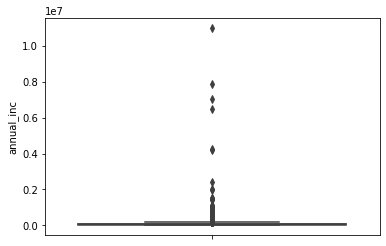

In [ ]:
import seaborn as sns
sns.boxplot(y=lending_data['annual_inc'])

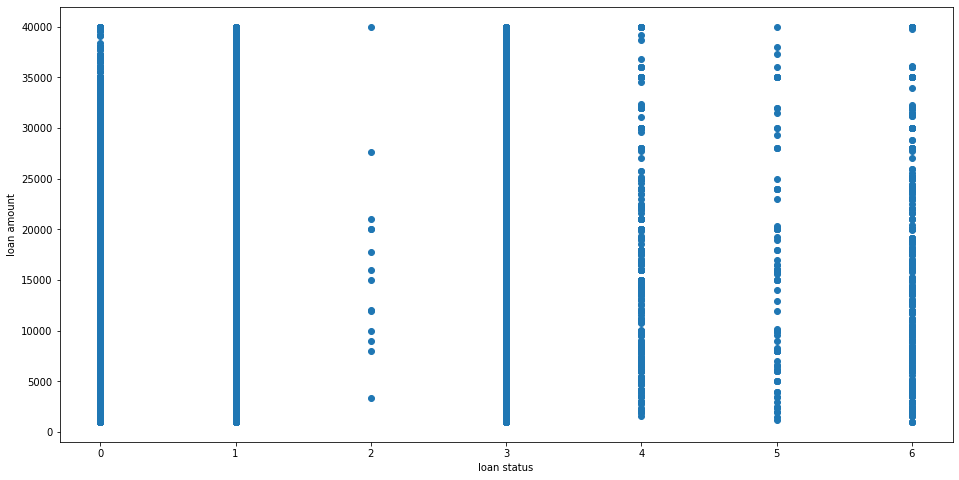

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(lending_data['loan_status'], lending_data['loan_amnt'])
ax.set_xlabel('loan status')
ax.set_ylabel('loan amount')
plt.show()